This notebook calculates reconstruction bias and RMSE for the different sampling experiments (reconstructions are compared to the "model truth" of the Large Ensemble Testbed), and we show the testbed spread using boxplots. This notebook also shows the difference in bias and RMSE between the full vs. unseen reconstruction for the SOCAT-baseline.

This notebook was created by Thea Hatlen Heimdal, in collaboration with Julius Busecke and Abby Shaum

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
# Bring in pickle file with 75 members of the LET

path_LET = "/local/data/artemis/workspace/theimdal/saildrone/LET_pickle_files/members_LET_dict.pickle" 

with open(path_LET,'rb') as handle:
    mems_dict = pickle.load(handle)

In [3]:
mems_dict

{'CESM': ['001',
  '002',
  '009',
  '010',
  '011',
  '012',
  '013',
  '014',
  '015',
  '016',
  '017',
  '018',
  '020',
  '021',
  '023',
  '024',
  '025',
  '030',
  '031',
  '034',
  '035',
  '101',
  '102',
  '103',
  '104'],
 'GFDL': ['01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '08',
  '09',
  '10',
  '11',
  '12',
  '13',
  '14',
  '16',
  '17',
  '18',
  '19',
  '20',
  '22',
  '23',
  '26',
  '27',
  '28',
  '29',
  '30'],
 'CanESM2': ['r1r10',
  'r1r9',
  'r3r1',
  'r4r5',
  'r5r10',
  'r2r1',
  'r3r2',
  'r3r9',
  'r4r6',
  'r5r2',
  'r1r6',
  'r2r2',
  'r3r4',
  'r4r1',
  'r4r7',
  'r5r4',
  'r1r7',
  'r3r6',
  'r4r8',
  'r5r5',
  'r2r8',
  'r3r7',
  'r4r3',
  'r5r1',
  'r5r9']}

### Bring in all reconstructions for the different sampling experiments

#### SOCAT only

#### Unseen reconstruction (not including train or test)

In [3]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/SOCAT/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_SOCAT_only_unseen = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Full reconstruction

In [4]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/SOCAT/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_full_recon 
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_SOCAT_only_full = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### 5 years

In [5]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_5/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_5 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### 5 years winter

In [5]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_5/models/saildrone5_5x_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_5_5x_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### 10 years

In [6]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### 10 years shifted

In [7]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/saildrone10_shifted/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10_shifted = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### zigzag 10 years

In [8]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/10_years/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_10 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### zigzag 10 years winter

In [9]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/10_years_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_10_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### 10 years 13 saildrones

In [10]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/saildrone10_mult_12/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10_mult_12 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### 10 years 13 saildrone winter

In [11]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/saildrone10_mult_12_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10_mult_12_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### zigzag 5 years

In [12]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/5_years_x12/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_5_x12 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### zigzag 5 years winter

In [13]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/5_years_x12_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_5_x12_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Compare seen vs. unseen reconstruction bias for the SOCAT-baseline

In [7]:
#Calculate bias for the full and unseen reconstruction

mean_vars = ['time', 'status', 'ylat', 'xlon']

bias_SOCAT_SO_unseen = ds_SOCAT_only_unseen.diff('status').mean(mean_vars)
bias_SOCAT_unseen = bias_SOCAT_SO_unseen.to_dataframe()

In [9]:
bias_SOCAT_SO_full = ds_SOCAT_only_full.diff('status').mean(mean_vars)
bias_SOCAT_full = bias_SOCAT_SO_full.to_dataframe()

SOCAT_unseen_reset = bias_SOCAT_unseen.reset_index()
SOCAT_full_reset = bias_SOCAT_full.reset_index()

SOCAT_unseen_set = SOCAT_unseen_reset.set_index(['ensemble','n_member','member'])
SOCAT_full_set = SOCAT_full_reset.set_index(['ensemble','n_member','member'])

bias_SOCAT_unseen_final = SOCAT_unseen_set
bias_SOCAT_full_final = SOCAT_full_set

In [16]:
#Calculate mean bias (globally, 1982-2016) for the full reconstruction
print(np.nanmean(bias_SOCAT_SO_full))

0.6376534683410238


In [17]:
#Calculate mean bias (globally, 1982-2016) for the unseen reconstruction
print(np.nanmean(bias_SOCAT_SO_unseen))

0.6478517357542005


#### Compare the spread in bias for the full vs. unseen reconstruction of the SOCAT-baseline

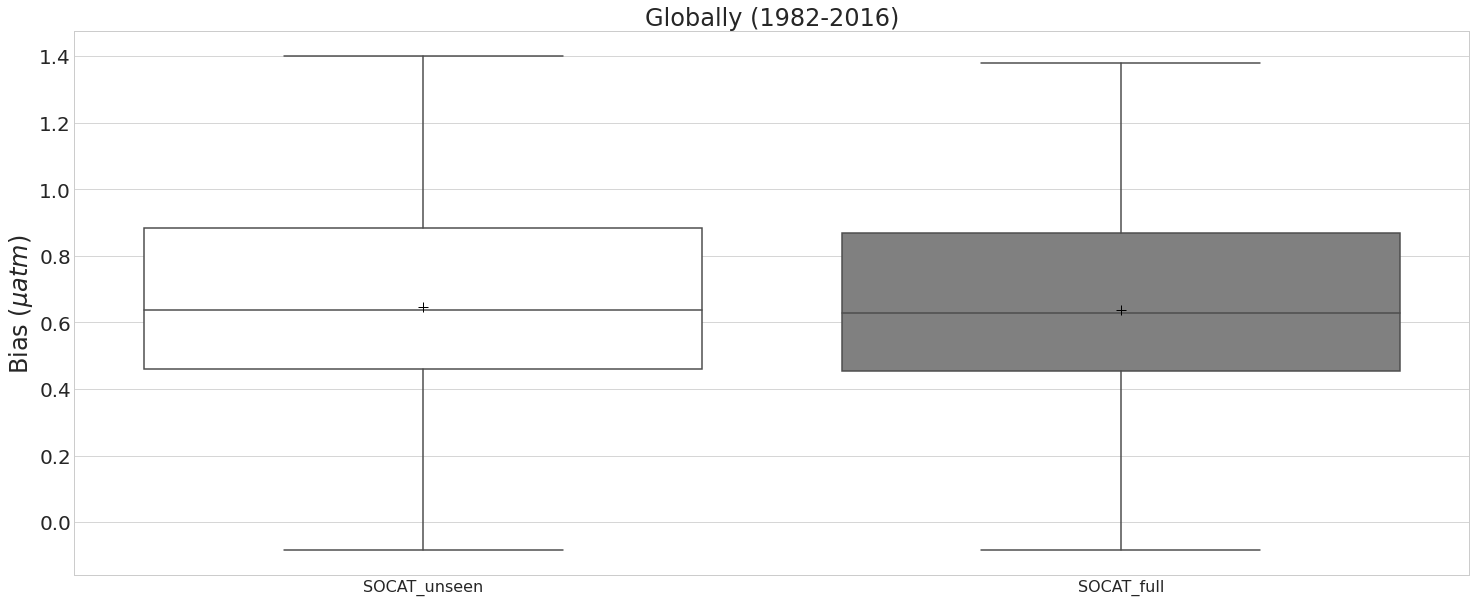

In [18]:
colors = ['white','gray']
labels = ['SOCAT_unseen','SOCAT_full']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [bias_SOCAT_unseen_final,bias_SOCAT_full_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('Globally (1982-2016)', fontsize= 24)
    plt.ylabel(f'Bias ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1], fontsize = 16, labels = labels)
    plt.yticks(fontsize = 20)
    
#fig.savefig("/home/theimdal/unseen_full_bias_SOCAT_boxplot.jpg",dpi=300, bbox_inches="tight")

### Compare bias for all runs - boxplots

In [14]:
# Calculate bias for all experiments

mean_vars = ['time', 'status', 'ylat', 'xlon']
ylat_slice = slice(-90,-35)
#time_slice = slice('2012', '2016')

bias_SOCAT_SO_full = ds_SOCAT_only_full.diff('status').sel(ylat=ylat_slice,time=slice('2006', '2016')).mean(mean_vars)
bias_5_SO_full = ds_Saildrone_5.diff('status').sel(ylat=ylat_slice,time=slice('2012', '2016')).mean(mean_vars)
bias_5_winter_SO_full = ds_Saildrone_5_5x_winter.diff('status').sel(ylat=ylat_slice,time=slice('2012', '2016')).mean(mean_vars)
bias_10_SO_full = ds_Saildrone_10.diff('status').sel(ylat=ylat_slice,time=slice('2006', '2016')).mean(mean_vars)
bias_10_shifted_SO_full = ds_Saildrone_10_shifted.diff('status').sel(ylat=ylat_slice,time=slice('2006', '2016')).mean(mean_vars)
bias_x12_SO_full = ds_Saildrone_10_mult_12.diff('status').sel(ylat=ylat_slice,time=slice('2006', '2016')).mean(mean_vars)
bias_x12_winter_SO_full = ds_Saildrone_10_mult_12_winter.diff('status').sel(ylat=ylat_slice,time=slice('2006', '2016')).mean(mean_vars)
bias_zigzag_10_SO_full = ds_Saildrone_zigzag_10.diff('status').sel(ylat=ylat_slice,time=slice('2006', '2016')).mean(mean_vars)
bias_zigzag_10_winter_SO_full = ds_Saildrone_zigzag_10_winter.diff('status').sel(ylat=ylat_slice,time=slice('2006', '2016')).mean(mean_vars)
bias_zigzag_5_SO_full = ds_Saildrone_zigzag_5_x12.diff('status').sel(ylat=ylat_slice,time=slice('2012', '2016')).mean(mean_vars)
bias_zigzag_5_winter_SO_full = ds_Saildrone_zigzag_5_x12_winter.diff('status').sel(ylat=ylat_slice,time=slice('2012', '2016')).mean(mean_vars)

In [15]:
bias_SOCAT_full = bias_SOCAT_SO_full.to_dataframe()
bias_sail_5_full = bias_5_SO_full.to_dataframe()
bias_sail_5_w_full = bias_5_winter_SO_full.to_dataframe()
bias_sail_10_full = bias_10_SO_full.to_dataframe()
bias_sail_10_shifted_full = bias_10_shifted_SO_full.to_dataframe()
bias_sail_x12_full = bias_x12_SO_full.to_dataframe()
bias_sail_x12_w_full = bias_x12_winter_SO_full.to_dataframe()
bias_zigzag_10_full = bias_zigzag_10_SO_full.to_dataframe()
bias_zigzag_10_w_full = bias_zigzag_10_winter_SO_full.to_dataframe()
bias_zigzag_5_full = bias_zigzag_5_SO_full.to_dataframe()
bias_zigzag_5_w_full = bias_zigzag_5_winter_SO_full.to_dataframe()

In [16]:
SOCAT_reset = bias_SOCAT_full.reset_index()
sail5_reset = bias_sail_5_full.reset_index()
sail5_winter_reset = bias_sail_5_w_full.reset_index()
sail10_reset = bias_sail_10_full.reset_index()
sail10_shifted_reset = bias_sail_10_shifted_full.reset_index()
sail_x13_reset = bias_sail_x12_full.reset_index()
sailx13_winter_reset = bias_sail_x12_w_full.reset_index()
z10_reset = bias_zigzag_10_full.reset_index()
z10_winter_reset = bias_zigzag_10_w_full.reset_index()
z5_reset = bias_zigzag_5_full.reset_index()
z5_winter_reset = bias_zigzag_5_w_full.reset_index()

In [17]:
SOCAT_set_index = SOCAT_reset.set_index(['ensemble','n_member','member'])
sail5_set_index = sail5_reset.set_index(['ensemble','n_member','member'])
sail5_winter_set_index = sail5_winter_reset.set_index(['ensemble','n_member','member'])
sail10_set_index = sail10_reset.set_index(['ensemble','n_member','member'])
sail10_shifted_set_index = sail10_shifted_reset.set_index(['ensemble','n_member','member'])
sailx13_set_index = sail_x13_reset.set_index(['ensemble','n_member','member'])
sailx13_winter_set_index = sailx13_winter_reset.set_index(['ensemble','n_member','member'])
z10_set_index = z10_reset.set_index(['ensemble','n_member','member'])
z10_winter_set_index = z10_winter_reset.set_index(['ensemble','n_member','member'])
z5_set_index = z5_reset.set_index(['ensemble','n_member','member'])
z5_winter_set_index = z5_winter_reset.set_index(['ensemble','n_member','member'])

In [18]:
SOCAT_final = SOCAT_set_index
sail5_final = sail5_set_index
sail5_winter_final = sail5_winter_set_index
sail10_final = sail10_set_index
sail10_shifted_final = sail10_shifted_set_index
sailx13_final = sailx13_set_index 
sailx13_winter_final = sailx13_winter_set_index
z10_final = z10_set_index
z10_winter_final = z10_winter_set_index
z5_final = z5_set_index
z5_winter_final = z5_winter_set_index

### Southern Ocean 2006/2012-2016 - full testbed (all 75 members)

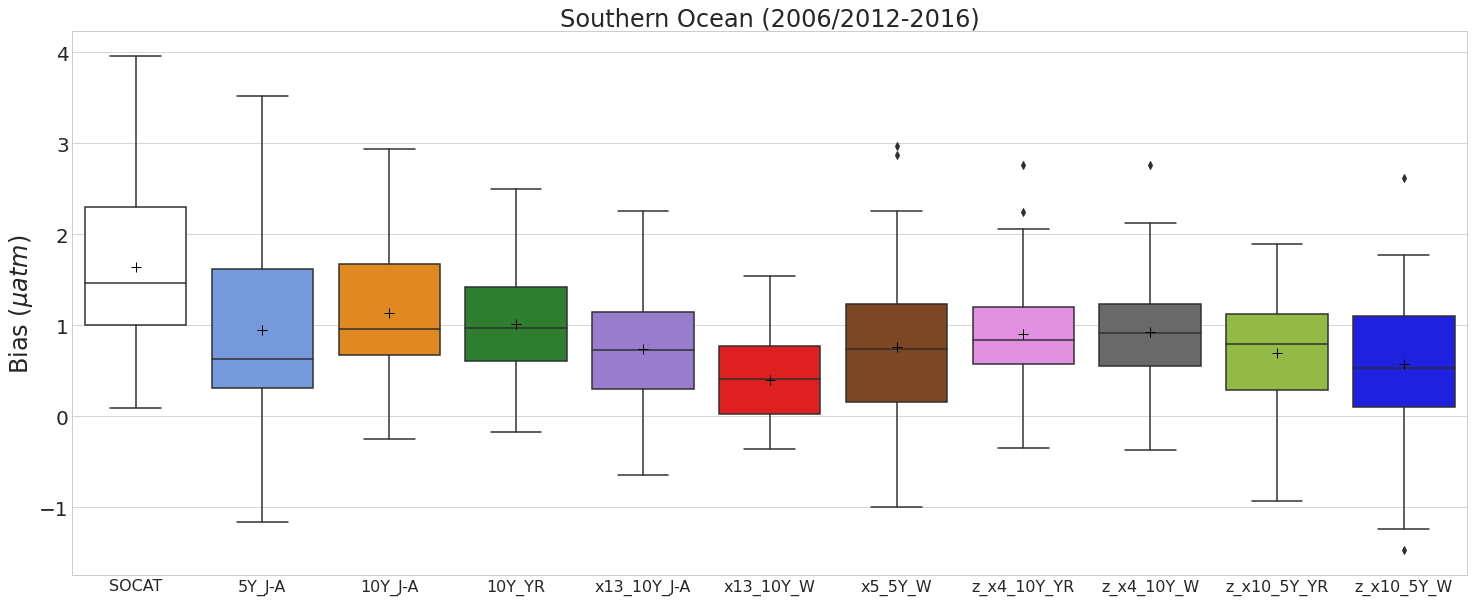

In [21]:
colors = ['white','cornflowerblue', 'darkorange','forestgreen', 'mediumpurple', 'red', 'saddlebrown', 'violet', 'dimgray', 'yellowgreen', 'blue']
labels = ['SOCAT','5Y_J-A','10Y_J-A','10Y_YR','x13_10Y_J-A','x13_10Y_W','x5_5Y_W','z_x4_10Y_YR','z_x4_10Y_W','z_x10_5Y_YR','z_x10_5Y_W']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [SOCAT_final,sail5_final,sail10_final,sail10_shifted_final,sailx13_final,sailx13_winter_final,sail5_winter_final,z10_final,z10_winter_final,z5_final,z5_winter_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('Southern Ocean (2006/2012-2016)', fontsize= 24)
    plt.ylabel(f'Bias ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10], fontsize = 16, labels = labels)
    plt.yticks(fontsize = 20)
    
#fig.savefig("/home/theimdal/bias_SO_2006_2016_boxplot.jpg",dpi=300, bbox_inches="tight")

### Per model

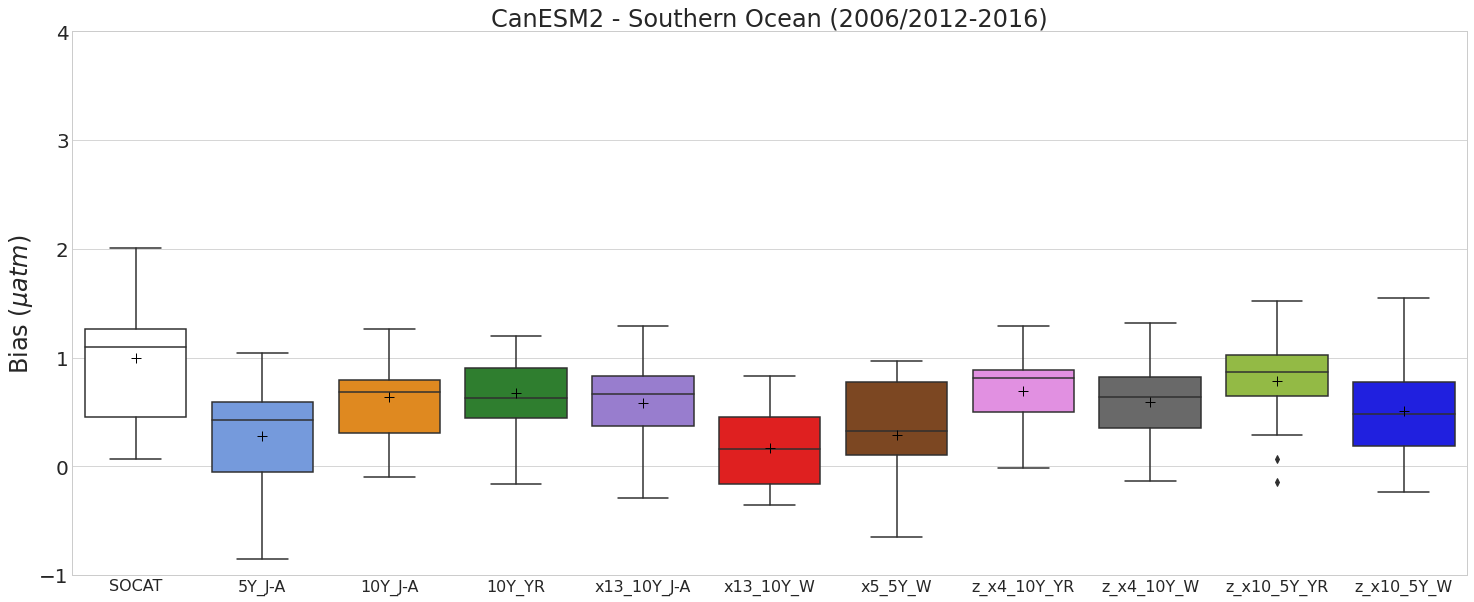

In [20]:
colors = ['white','cornflowerblue', 'darkorange','forestgreen', 'mediumpurple', 'red', 'saddlebrown', 'violet', 'dimgray', 'yellowgreen', 'blue']
labels = ['SOCAT','5Y_J-A','10Y_J-A','10Y_YR','x13_10Y_J-A','x13_10Y_W','x5_5Y_W','z_x4_10Y_YR','z_x4_10Y_W','z_x10_5Y_YR','z_x10_5Y_W']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [SOCAT_final,sail5_final,sail10_final,sail10_shifted_final,sailx13_final,sailx13_winter_final,sail5_winter_final,z10_final,z10_winter_final,z5_final,z5_winter_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('CanESM2 - Southern Ocean (2006/2012-2016)', fontsize= 24)
    plt.ylabel(f'Bias ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10], fontsize = 16, labels = labels)
    plt.yticks(fontsize = 20)
    plt.ylim(-1,4)
    
#fig.savefig("/home/theimdal/CanESM2_bias_SO_2006_2016_boxplot.jpg",dpi=300, bbox_inches="tight")

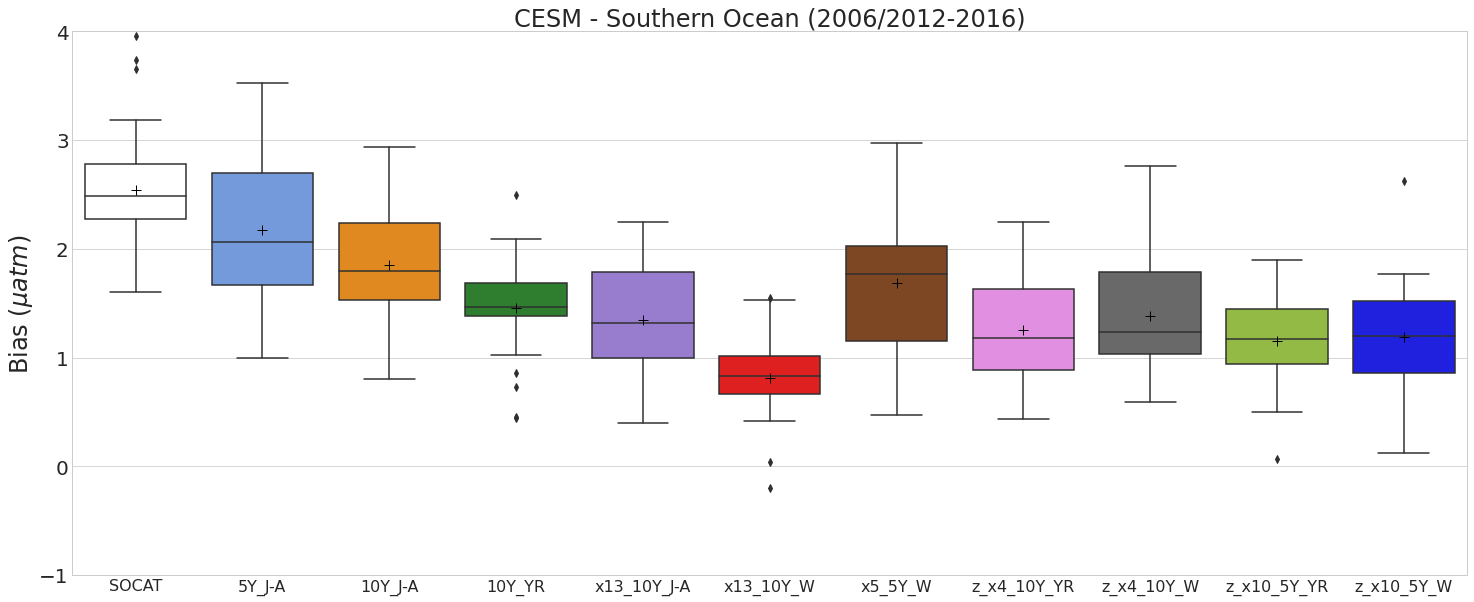

In [20]:
colors = ['white','cornflowerblue', 'darkorange','forestgreen', 'mediumpurple', 'red', 'saddlebrown', 'violet', 'dimgray', 'yellowgreen', 'blue']
labels = ['SOCAT','5Y_J-A','10Y_J-A','10Y_YR','x13_10Y_J-A','x13_10Y_W','x5_5Y_W','z_x4_10Y_YR','z_x4_10Y_W','z_x10_5Y_YR','z_x10_5Y_W']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [SOCAT_final,sail5_final,sail10_final,sail10_shifted_final,sailx13_final,sailx13_winter_final,sail5_winter_final,z10_final,z10_winter_final,z5_final,z5_winter_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('CESM - Southern Ocean (2006/2012-2016)', fontsize= 24)
    plt.ylabel(f'Bias ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10], fontsize = 16, labels = labels)
    plt.yticks(fontsize = 20)
    plt.ylim(-1,4)
    
#fig.savefig("/home/theimdal/CESM_bias_SO_2006_2016_boxplot.jpg",dpi=300, bbox_inches="tight")

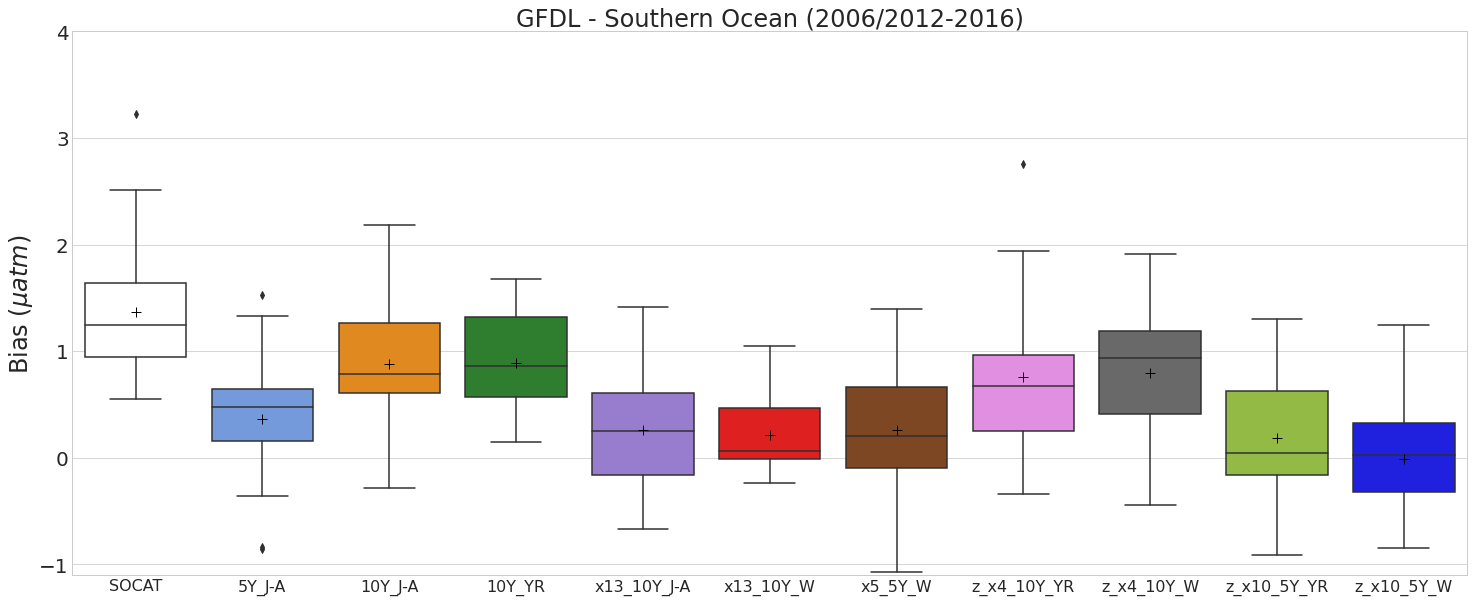

In [26]:
colors = ['white','cornflowerblue', 'darkorange','forestgreen', 'mediumpurple', 'red', 'saddlebrown', 'violet', 'dimgray', 'yellowgreen', 'blue']
labels = ['SOCAT','5Y_J-A','10Y_J-A','10Y_YR','x13_10Y_J-A','x13_10Y_W','x5_5Y_W','z_x4_10Y_YR','z_x4_10Y_W','z_x10_5Y_YR','z_x10_5Y_W']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [SOCAT_final,sail5_final,sail10_final,sail10_shifted_final,sailx13_final,sailx13_winter_final,sail5_winter_final,z10_final,z10_winter_final,z5_final,z5_winter_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('GFDL - Southern Ocean (2006/2012-2016)', fontsize= 24)
    plt.ylabel(f'Bias ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10], fontsize = 16, labels = labels)
    plt.yticks(fontsize = 20)
    plt.ylim(-1.1,4)
    
#fig.savefig("/home/theimdal/GFDL_bias_SO_2006_2016_boxplot.jpg",dpi=300, bbox_inches="tight")

### RMSE

### Compare unseen vs. full reconstruction RMSE for the SOCAT-baseline

In [22]:
# Calculate RMSE for unseen and full reconstruction
mean_vars = ['time', 'status', 'ylat', 'xlon']

RMSE_SOCAT_unseen = xr.ufuncs.sqrt(((ds_SOCAT_only_unseen.diff('status'))**2).mean(mean_vars))
RMSE_SOCAT_full = xr.ufuncs.sqrt(((ds_SOCAT_only_full.diff('status'))**2).mean(mean_vars))

In [25]:
#### Dataframe for boxplot
SOCAT_RMSE_full = RMSE_SOCAT_full.to_dataframe()
SOCAT_RMSE_unseen = RMSE_SOCAT_unseen.to_dataframe()

SOCAT_unseen_reset = SOCAT_RMSE_unseen.reset_index()
SOCAT_full_reset = SOCAT_RMSE_full.reset_index()

SOCAT_unseen_set = SOCAT_unseen_reset.set_index(['ensemble','n_member','member'])
SOCAT_full_set = SOCAT_full_reset.set_index(['ensemble','n_member','member'])

RMSE_SOCAT_unseen_final = SOCAT_unseen_set
RMSE_SOCAT_full_final = SOCAT_full_set

In [27]:
# Mean RMSE (Globally, 1982-2016) for the full reconstruction
print(np.nanmean(RMSE_SOCAT_SO_full))

11.758361553006193


In [28]:
# Mean RMSE (Globally, 1982-2016) for the unseen reconstruction
print(np.nanmean(RMSE_SOCAT_SO_unseen))

11.836229036166374


### Compare the spread in RMSE for the full and unseen reconstruction

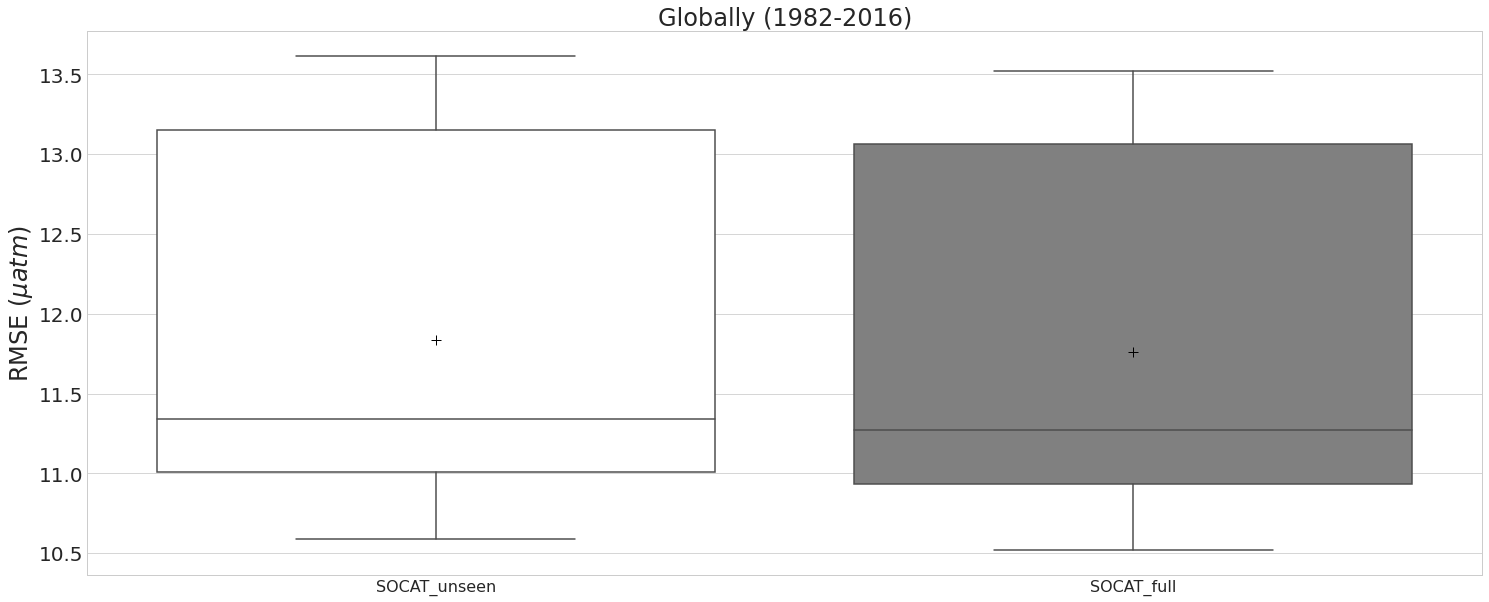

In [29]:
colors = ['white','gray']
labels = ['SOCAT_unseen','SOCAT_full']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [RMSE_SOCAT_unseen_final,RMSE_SOCAT_full_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('Globally (1982-2016)', fontsize= 24)
    plt.ylabel(f'RMSE ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1], fontsize = 16, labels = labels)
    plt.yticks(fontsize = 20)
    
#fig.savefig("/home/theimdal/unseen_full_RMSE_boxplot.jpg",dpi=300, bbox_inches="tight")

### All runs

#### Southern Ocean 2006/2012-2016

In [15]:
# Calculate RMSE for all experiments

mean_vars = ['time', 'status', 'ylat', 'xlon']
ylat_slice = slice(-90,-35)

RMSE_SOCAT = xr.ufuncs.sqrt(((ds_SOCAT_only_full.diff('status'))**2).sel(ylat=ylat_slice,time=slice('2006', '2016')).mean(mean_vars))
RMSE_5 = xr.ufuncs.sqrt(((ds_Saildrone_5.diff('status'))**2).sel(ylat=ylat_slice,time=slice('2012', '2016')).mean(mean_vars))
RMSE_5_winter = xr.ufuncs.sqrt(((ds_Saildrone_5_5x_winter.diff('status'))**2).sel(ylat=ylat_slice,time=slice('2012', '2016')).mean(mean_vars))
RMSE_10 = xr.ufuncs.sqrt(((ds_Saildrone_10.diff('status'))**2).sel(ylat=ylat_slice,time=slice('2006', '2016')).mean(mean_vars))
RMSE_10_shifted = xr.ufuncs.sqrt(((ds_Saildrone_10_shifted.diff('status'))**2).sel(ylat=ylat_slice,time=slice('2006', '2016')).mean(mean_vars))
RMSE_x12 = xr.ufuncs.sqrt(((ds_Saildrone_10_mult_12.diff('status'))**2).sel(ylat=ylat_slice,time=slice('2006', '2016')).mean(mean_vars))
RMSE_x12_winter = xr.ufuncs.sqrt(((ds_Saildrone_10_mult_12_winter.diff('status'))**2).sel(ylat=ylat_slice,time=slice('2006', '2016')).mean(mean_vars))
RMSE_zigzag_10 = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_10.diff('status'))**2).sel(ylat=ylat_slice,time=slice('2006', '2016')).mean(mean_vars))
RMSE_zigzag_10_winter = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_10_winter.diff('status'))**2).sel(ylat=ylat_slice,time=slice('2006', '2016')).mean(mean_vars))
RMSE_zigzag_5 = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_5_x12.diff('status'))**2).sel(ylat=ylat_slice,time=slice('2012', '2016')).mean(mean_vars))
RMSE_zigzag_5_winter = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_5_x12_winter.diff('status'))**2).sel(ylat=ylat_slice,time=slice('2012', '2016')).mean(mean_vars))

In [7]:
#### Dataframe for boxplot

SOCAT_RMSE_full = RMSE_SOCAT.to_dataframe()
sail_5_RMSE_full = RMSE_5 .to_dataframe()
sail_5_w_RMSE_full = RMSE_5_winter.to_dataframe()
sail_10_RMSE_full = RMSE_10.to_dataframe()
sail_10_shifted_RMSE_full = RMSE_10_shifted.to_dataframe()
sail_x12_RMSE_full = RMSE_x12.to_dataframe()
sail_x12_w_RMSE_full = RMSE_x12_winter.to_dataframe()
zigzag_10_RMSE_full = RMSE_zigzag_10.to_dataframe()
zigzag_10_w_RMSE_full = RMSE_zigzag_10_winter.to_dataframe()
zigzag_5_RMSE_full = RMSE_zigzag_5.to_dataframe()
zigzag_5_w_RMSE_full = RMSE_zigzag_5_winter.to_dataframe()

In [8]:
### Reset index

SOCAT_reset = SOCAT_RMSE_full.reset_index()
sail5_reset = sail_5_RMSE_full.reset_index()
sail5_winter_reset = sail_5_w_RMSE_full.reset_index()
sail10_reset = sail_10_RMSE_full.reset_index()
sail10_shifted_reset = sail_10_shifted_RMSE_full.reset_index()
sail_x13_reset = sail_x12_RMSE_full.reset_index()
sailx13_winter_reset = sail_x12_w_RMSE_full.reset_index()
z10_reset = zigzag_10_RMSE_full.reset_index()
z10_winter_reset = zigzag_10_w_RMSE_full.reset_index()
z5_reset = zigzag_5_RMSE_full.reset_index()
z5_winter_reset = zigzag_5_w_RMSE_full.reset_index()

In [9]:
### Set index

SOCAT_set_index = SOCAT_reset.set_index(['ensemble','n_member','member'])
sail5_set_index = sail5_reset.set_index(['ensemble','n_member','member'])
sail5_winter_set_index = sail5_winter_reset.set_index(['ensemble','n_member','member'])
sail10_set_index = sail10_reset.set_index(['ensemble','n_member','member'])
sail10_shifted_set_index = sail10_shifted_reset.set_index(['ensemble','n_member','member'])
sailx13_set_index = sail_x13_reset.set_index(['ensemble','n_member','member'])
sailx13_winter_set_index = sailx13_winter_reset.set_index(['ensemble','n_member','member'])
z10_set_index = z10_reset.set_index(['ensemble','n_member','member'])
z10_winter_set_index = z10_winter_reset.set_index(['ensemble','n_member','member'])
z5_set_index = z5_reset.set_index(['ensemble','n_member','member'])
z5_winter_set_index = z5_winter_reset.set_index(['ensemble','n_member','member'])

In [10]:
### Rename for plotting

SOCAT_final = SOCAT_set_index
sail5_final = sail5_set_index
sail5_winter_final = sail5_winter_set_index
sail10_final = sail10_set_index
sail10_shifted_final = sail10_shifted_set_index
sailx13_final = sailx13_set_index 
sailx13_winter_final = sailx13_winter_set_index
z10_final = z10_set_index
z10_winter_final = z10_winter_set_index
z5_final = z5_set_index
z5_winter_final = z5_winter_set_index

### Southern Ocean 2006/2012-2016

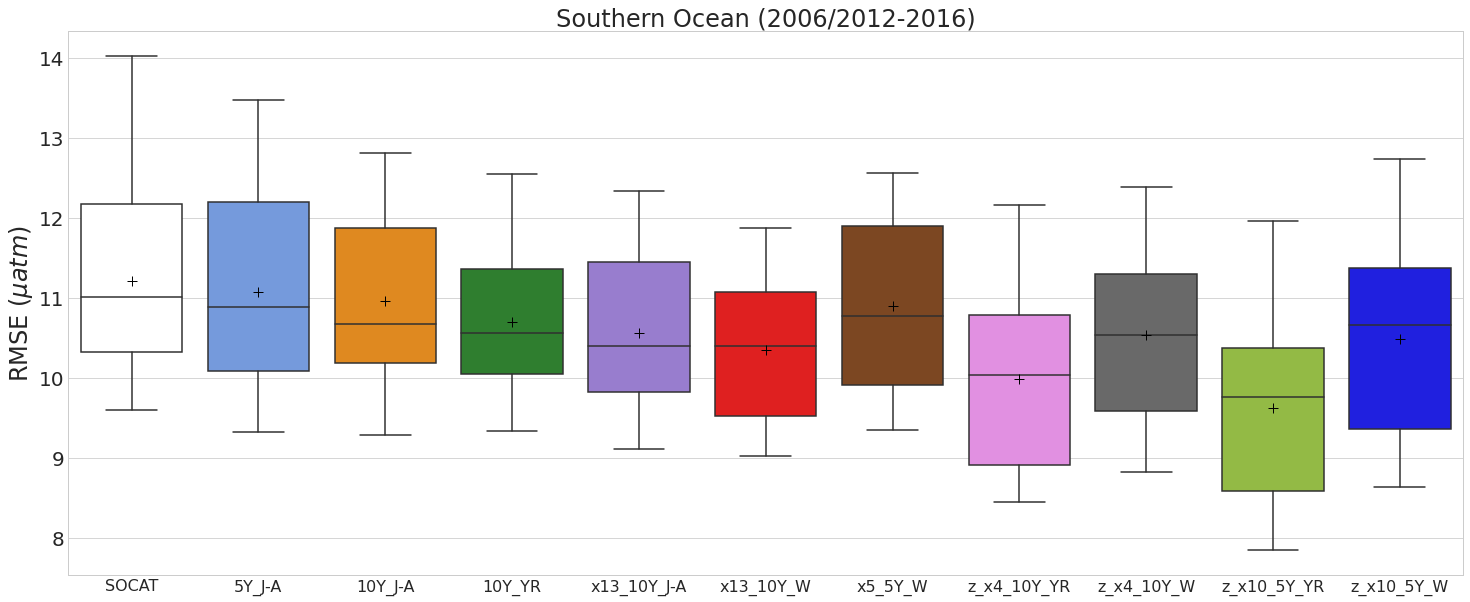

In [27]:
colors = ['white','cornflowerblue', 'darkorange','forestgreen', 'mediumpurple', 'red', 'saddlebrown', 'violet', 'dimgray', 'yellowgreen', 'blue']
labels = ['SOCAT','5Y_J-A','10Y_J-A','10Y_YR','x13_10Y_J-A','x13_10Y_W','x5_5Y_W','z_x4_10Y_YR','z_x4_10Y_W','z_x10_5Y_YR','z_x10_5Y_W']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [SOCAT_final,sail5_final,sail10_final,sail10_shifted_final,sailx13_final,sailx13_winter_final,sail5_winter_final,z10_final,z10_winter_final,z5_final,z5_winter_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('Southern Ocean (2006/2012-2016)', fontsize= 24)
    plt.ylabel(f'RMSE ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10], fontsize = 16, labels = labels)
    plt.yticks(fontsize = 20)
    
#fig.savefig("/home/theimdal/RMSE_SO_2006_2016_boxplot.jpg",dpi=300, bbox_inches="tight")

### Individual models

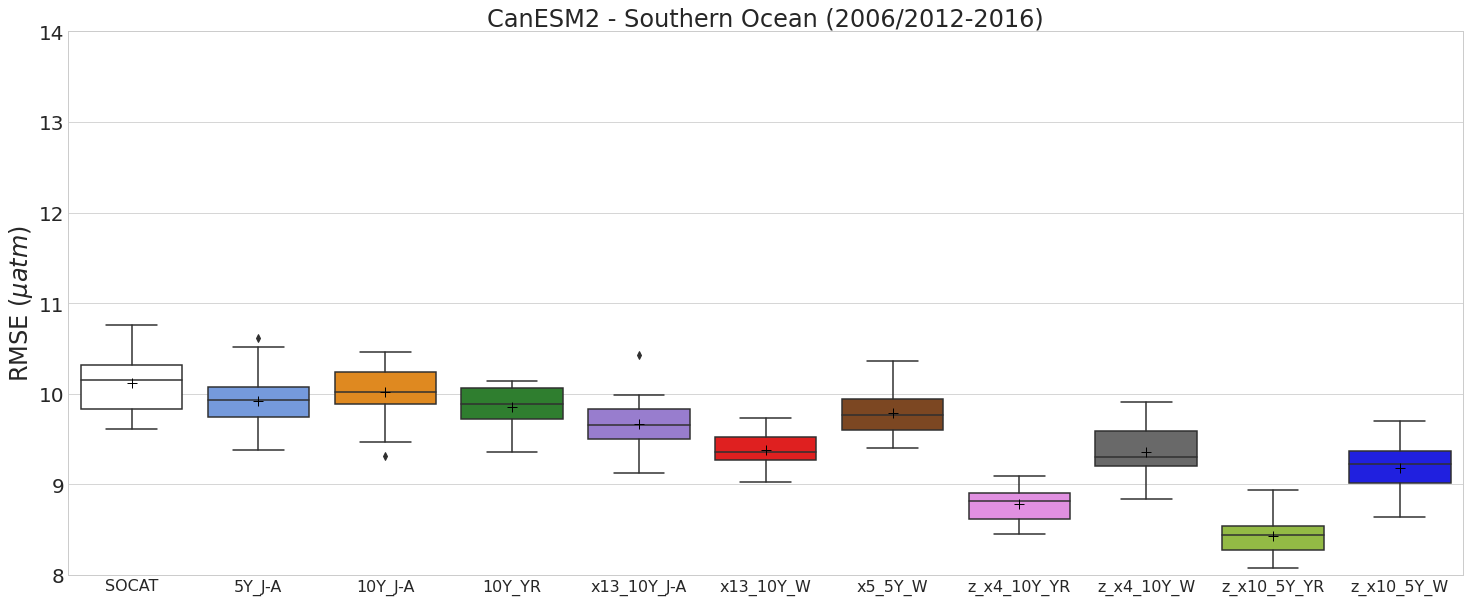

In [20]:
colors = ['white','cornflowerblue', 'darkorange','forestgreen', 'mediumpurple', 'red', 'saddlebrown', 'violet', 'dimgray', 'yellowgreen', 'blue']
labels = ['SOCAT','5Y_J-A','10Y_J-A','10Y_YR','x13_10Y_J-A','x13_10Y_W','x5_5Y_W','z_x4_10Y_YR','z_x4_10Y_W','z_x10_5Y_YR','z_x10_5Y_W']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [SOCAT_final,sail5_final,sail10_final,sail10_shifted_final,sailx13_final,sailx13_winter_final,sail5_winter_final,z10_final,z10_winter_final,z5_final,z5_winter_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('CanESM2 - Southern Ocean (2006/2012-2016)', fontsize= 24)
    plt.ylabel(f'RMSE ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10], fontsize = 16, labels = labels)
    plt.yticks(fontsize = 20)
    plt.ylim(8,14)
    
#fig.savefig("/home/theimdal/CanESM2_RMSE_SO_2006_2016_boxplot.jpg",dpi=300, bbox_inches="tight")

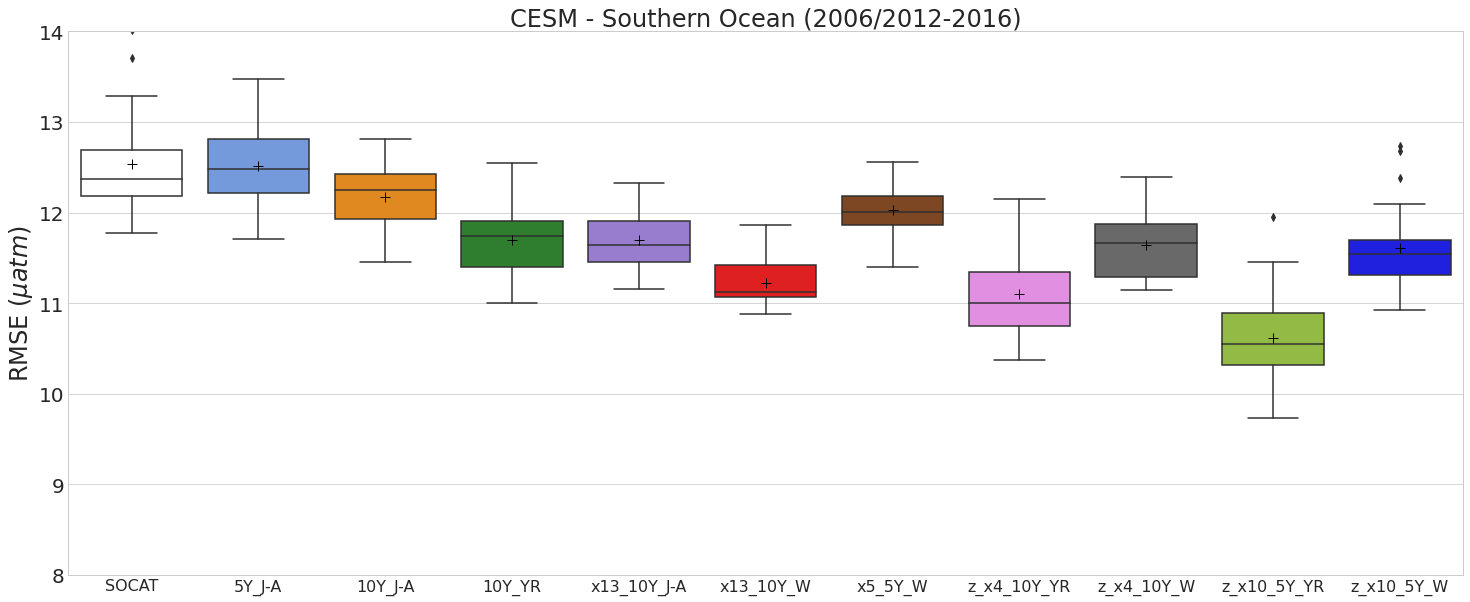

In [26]:
colors = ['white','cornflowerblue', 'darkorange','forestgreen', 'mediumpurple', 'red', 'saddlebrown', 'violet', 'dimgray', 'yellowgreen', 'blue']
labels = ['SOCAT','5Y_J-A','10Y_J-A','10Y_YR','x13_10Y_J-A','x13_10Y_W','x5_5Y_W','z_x4_10Y_YR','z_x4_10Y_W','z_x10_5Y_YR','z_x10_5Y_W']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [SOCAT_final,sail5_final,sail10_final,sail10_shifted_final,sailx13_final,sailx13_winter_final,sail5_winter_final,z10_final,z10_winter_final,z5_final,z5_winter_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('CESM - Southern Ocean (2006/2012-2016)', fontsize= 24)
    plt.ylabel(f'RMSE ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10], fontsize = 16, labels = labels)
    plt.yticks(fontsize = 20)
    plt.ylim(8,14)
    
#fig.savefig("/home/theimdal/CESM_RMSE_SO_2006_2016_boxplot.jpg",dpi=300, bbox_inches="tight")

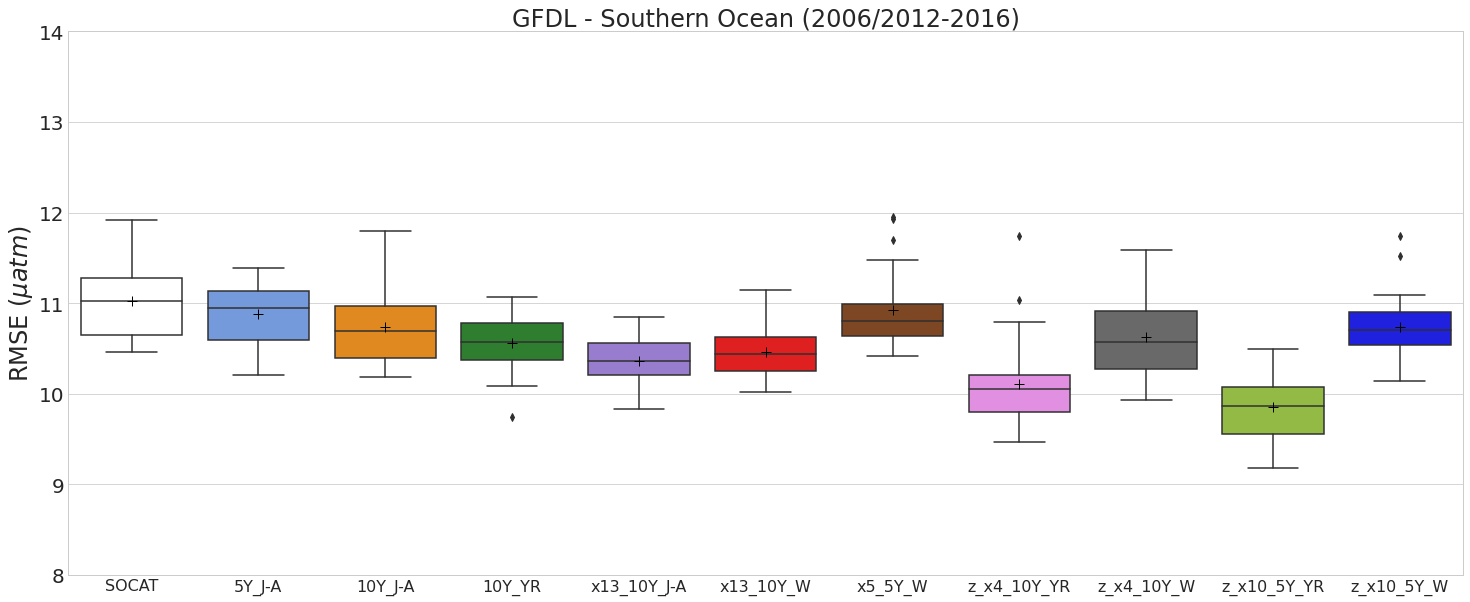

In [26]:
colors = ['white','cornflowerblue', 'darkorange','forestgreen', 'mediumpurple', 'red', 'saddlebrown', 'violet', 'dimgray', 'yellowgreen', 'blue']
labels = ['SOCAT','5Y_J-A','10Y_J-A','10Y_YR','x13_10Y_J-A','x13_10Y_W','x5_5Y_W','z_x4_10Y_YR','z_x4_10Y_W','z_x10_5Y_YR','z_x10_5Y_W']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [SOCAT_final,sail5_final,sail10_final,sail10_shifted_final,sailx13_final,sailx13_winter_final,sail5_winter_final,z10_final,z10_winter_final,z5_final,z5_winter_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('GFDL - Southern Ocean (2006/2012-2016)', fontsize= 24)
    plt.ylabel(f'RMSE ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10], fontsize = 16, labels = labels)
    plt.yticks(fontsize = 20)
    plt.ylim(8,14)
    
#fig.savefig("/home/theimdal/GFDL_RMSE_SO_2006_2016_boxplot.jpg",dpi=300, bbox_inches="tight")